In [1]:
import tensorflow as tf 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import random
from sklearn.model_selection import train_test_split
import keras

2024-03-02 10:09:29.950510: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 10:09:29.986259: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 10:09:30.142370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 10:09:30.142400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 10:09:30.169568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Data Handiling

## Loading Data

In [2]:
data_path = "data"

In [3]:
#creating training dataset
train_df = pd.DataFrame(columns = ["Images","Labels"])
train_df

,Images,Labels


In [ ]:
labels = dict()
count = 0
for i in os.listdir(os.path.join(data_path,"asl_alphabet_train")):
    labels[count] = i
    for j in os.listdir(os.path.join(data_path,"asl_alphabet_train",i)):
        image = cv2.imread(os.path.join(data_path,"asl_alphabet_train",i,j))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
        image = cv2.resize(image,(300,300))
        image = image.astype("float64")
        train_df.loc[len(train_df.index)] = [ image, count]
    count += 1 
len(labels.keys())

## Data Visualisation

In [5]:
train_df.head()

,Images,Labels
0,"[[30, 31, 32, 29, 29, 29, 29, 29, 29, 28, 28, ...",0
1,"[[29, 31, 32, 31, 31, 31, 30, 30, 30, 28, 29, ...",0
2,"[[30, 30, 30, 29, 29, 29, 28, 28, 30, 29, 30, ...",0
3,"[[30, 30, 30, 30, 30, 30, 29, 29, 29, 28, 28, ...",0
4,"[[30, 31, 32, 30, 28, 28, 29, 30, 31, 28, 29, ...",0


In [6]:
train_df.isnull().sum() # number of null values

Images    0
Labels    0
dtype: int64

In [7]:
train_df.describe()

,Labels
count,87000.000000
mean,14.000000
std,8.366648
min,0.000000
25%,7.000000
50%,14.000000
75%,21.000000
max,28.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87000 entries, 0 to 86999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  87000 non-null  object
 1   Labels  87000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [9]:
labels[train_df["Labels"][0]]

'space'

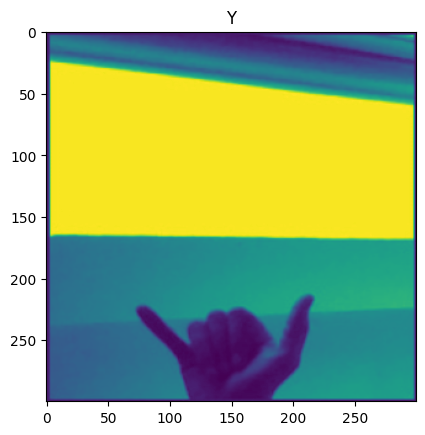

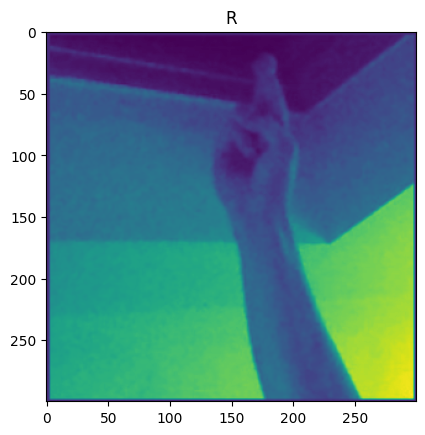

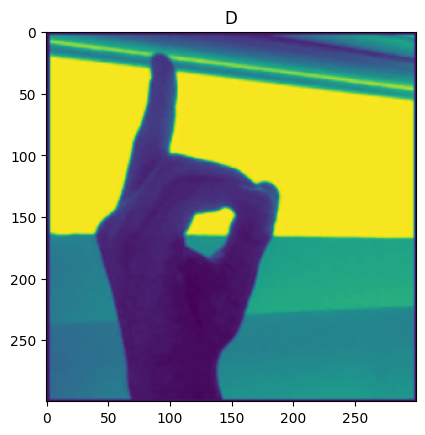

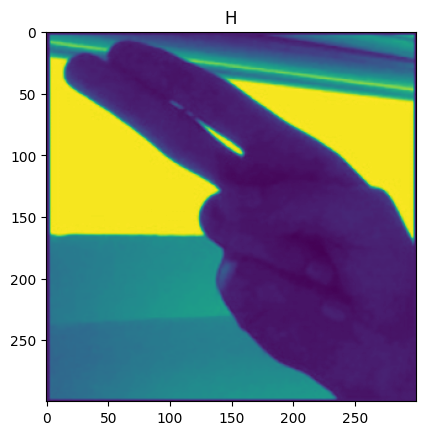

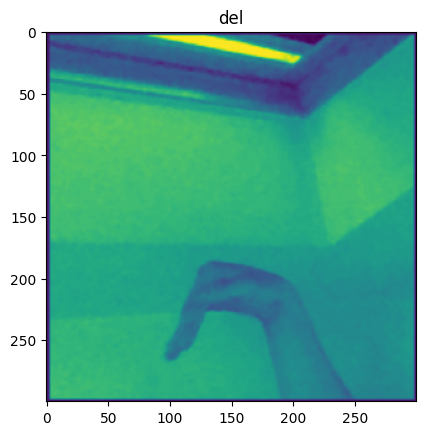

In [10]:
j = 0
for i in range(5):
    random_loc = random.randint(0,len(train_df))
    plt.imshow(train_df["Images"][random_loc])
    plt.title(labels[train_df["Labels"][random_loc]])
    plt.show()
    if j > 4: 
        break 
    else:
        j+=1

## Spliting Dataset for Training and Testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_df["Images"], train_df["Labels"], test_size=0.2, random_state=42)

In [12]:
print(X_train.shape,X_test.shape)

(69600,) (17400,)


In [13]:
print(y_train.shape,y_test.shape)

(69600,) (17400,)


In [14]:
print(X_train[0].shape,y_train[0].shape)

(300, 300) ()


# Model Training

In [15]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300,300,1)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation = "relu"),
    keras.layers.Dense(len(labels.keys()),activation = "softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 143, 143, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 654368)            0         
                                                        

In [17]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# X_train = X_train/1.

In [ ]:
# Reshape the input data
# X_train = X_train.reshape(-1, 300, 300, 1)
# X_train = 

In [ ]:
hist = model.fit(X_train,y_train,epochs = 16,batch_size = 64)